# TASK : IRIS FLOWER CLASSIFICATION

    Author:Debasmita Saha
    
    Batch:July Batch A61

    Domain:Data Science
    
    Aim:To build a model that can classify iris flower into different species based on their sepal and petal measurements

##### IMPORTING IMPORTANT LIBRARIES

In [21]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### IMPORTING DATASET

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.size

900

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Analyzing the Data Graphically

Text(0.5, 1.0, 'SepalLength vs Sepalwidth')

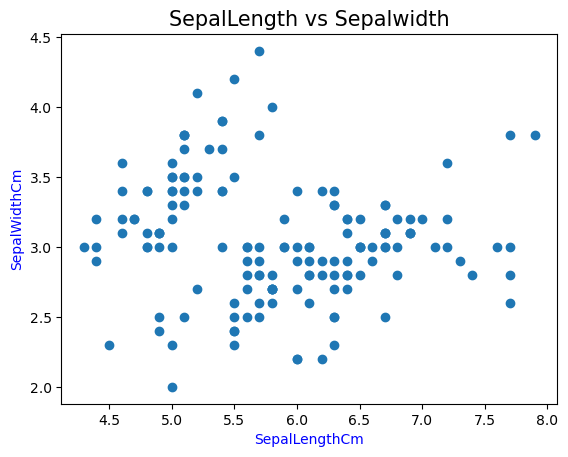

In [8]:
plt.scatter(x='SepalLengthCm',y='SepalWidthCm',data=df)
plt.xlabel('SepalLengthCm',color='b')
plt.ylabel('SepalWidthCm',color='b')
plt.title('SepalLength vs Sepalwidth',size=15,color='k')

Text(0.5, 1.0, 'petalLength vs PetalWidth')

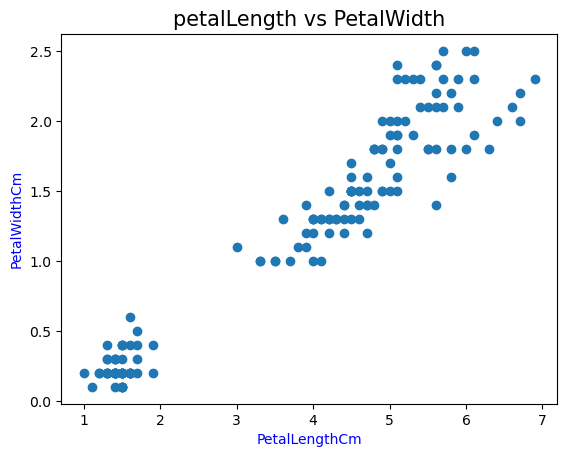

In [9]:
plt.scatter(x='PetalLengthCm',y='PetalWidthCm',data=df)
plt.xlabel('PetalLengthCm',color='b')
plt.ylabel('PetalWidthCm',color='b')
plt.title('petalLength vs PetalWidth',size=15,color='k')

Text(0.5, 1.0, 'petalLength vs sepalLength')

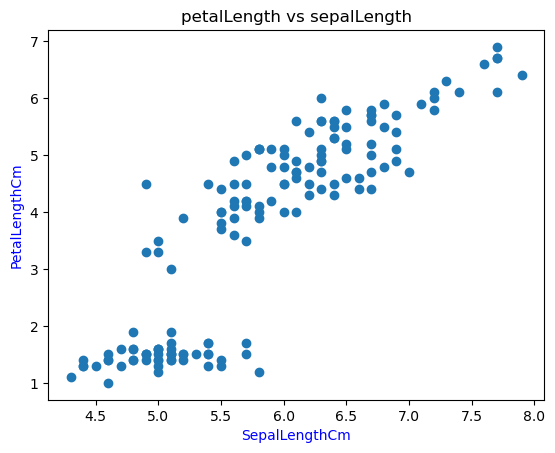

In [10]:
plt.scatter(x='SepalLengthCm',y='PetalLengthCm',data=df)
plt.xlabel('SepalLengthCm',color='b')
plt.ylabel('PetalLengthCm',color='b')
plt.title('petalLength vs sepalLength',color='k')

Text(0.5, 1.0, 'petalLength vs sepalLength')

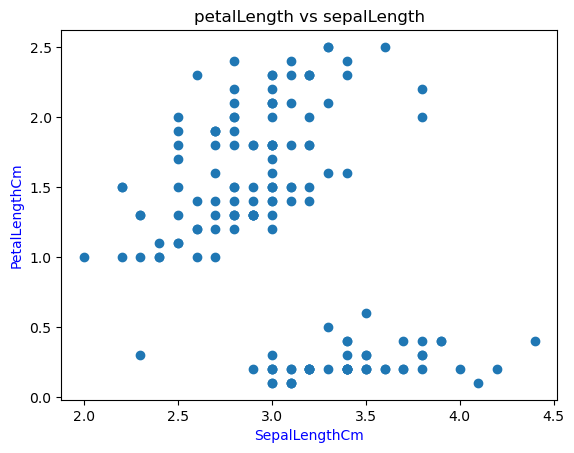

In [11]:
plt.scatter(x='SepalWidthCm',y='PetalWidthCm',data=df)
plt.xlabel('SepalLengthCm',color='b')
plt.ylabel('PetalLengthCm',color='b')
plt.title('petalLength vs sepalLength',color='k')

## Finding the Value of K by elbow method

In [12]:
# SSE--> Sum of Squared Errork_range = range(1,10)
k_range=range(1,10)
sse = []
for k in k_range:
    kMeans = KMeans(n_clusters=k)
    kMeans.fit(df[['SepalLengthCm','PetalLengthCm']])
    sse.append(kMeans.inertia_) #The SSE comes in Kmeans.inertia funtion

C:\Users\DEBASMITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
sse

[566.0320666666668,
 112.96262731481484,
 53.801351193126536,
 34.314420779220775,
 25.636859375524594,
 21.924820358020366,
 18.269923870094352,
 15.178437290969901,
 13.449075364290879]

Text(0.5, 1.0, 'Elbow Method For Optimal K')

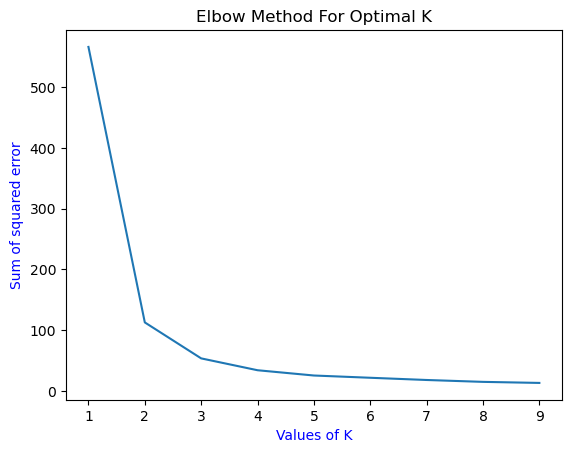

In [14]:
plt.xlabel('Values of K',color='b')
plt.ylabel('Sum of squared error',color='b')
plt.plot(k_range,sse)
plt.title('Elbow Method For Optimal K',color='k')

from the above plot the value of k is 3

## Creating a KMeans Classifier

In [16]:
KM = KMeans(n_clusters=3)
y_predicted = KM.fit_predict(df[['SepalLengthCm','PetalLengthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
df['cluster']=y_predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [47]:
KM.cluster_centers_

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

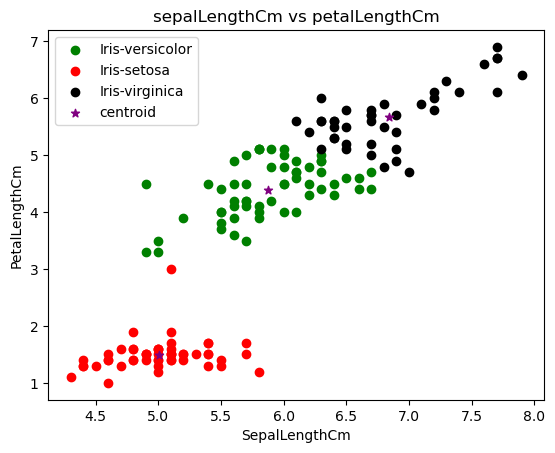

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(x='SepalLengthCm',y='PetalLengthCm',data=df1,color='green',label='Iris-versicolor')
plt.scatter(x='SepalLengthCm',y='PetalLengthCm',data=df2,color='red',label='Iris-setosa')
plt.scatter(x='SepalLengthCm',y='PetalLengthCm',data=df3,color='black',label='Iris-virginica')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title( 'sepalLengthCm vs petalLengthCm',color='k')
plt.legend()

# THE END